In [11]:
####################################################################
###    This is the PYTHON version of program 8.1 from page 293 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR epidemic (with equal births and deaths) and      #
### prophylactic vaccination. Vaccination starts at time tV, after #
### which a proportion p of all newborne individuals are vaccinated#
####################################################################

In [12]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*p is the proportion of new-borne individuals who are vaccinated.

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*nu is the over-all birth set. We set ν=μ to keep the population size constant.

*mu is the per captia death rate.

*tV	is the time at which the vaccination program is begun.

*S0 is the initial proportion of the population that are susceptible.

*I0 is the initial proportion of the population that are infectious.

In [13]:
beta=520/365.0;
gamma=1/7.0;
mu=1/(70*365.0);
S0=0.1;
I0=1e-4;
p0=0.7;
tV=30*365;
ND=MaxTime=100*365;
TS=1.0
R0=1-S0-I0

In [14]:
INPUT = np.hstack((S0,I0,R0))

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= mu*(1-p) - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= mu*p + gamma*V[1] - mu*V[2]
	return Y   # For odeint

t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))
p=0
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
p=p0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)
print(RES2)


[[1.00769308e-01 2.44819935e-04 8.98985872e-01]
 [1.00741947e-01 2.44973409e-04 8.99013079e-01]
 [1.00714577e-01 2.45117414e-04 8.99040306e-01]
 ...
 [1.01199364e-01 7.02983117e-05 8.98730337e-01]
 [1.01197004e-01 7.03881280e-05 8.98732608e-01]
 [1.01194630e-01 7.04778218e-05 8.98734892e-01]]


In [15]:
S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))

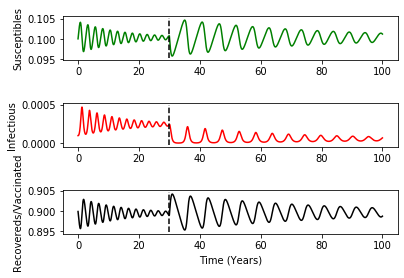

In [16]:
pl.subplot(311)
pl.plot(T[1:,]/365.0, S[1:,], '-g')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.subplots_adjust(hspace=1)
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(T[1:,]/365.0, I[1:,], '-r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(T[1:,]/365.0, R[1:,], '-k')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Recovereds/Vaccinated')
pl.xlabel('Time (Years)')

pl.show()